# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

In [7]:
# Importação de bibliotecas

# Manipulação de dados
import pandas as pd 
import numpy as np

# Visualização
import seaborn as sns 
import matplotlib.pyplot as plt

# Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Métricas de avaliação
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
# Carregando o dataset com separador ';'
df = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [9]:
# Visualizando as 5 primeiras linhas 
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1


In [10]:
# Visualizar o tamanho do dataset
df.shape

(2240, 16)

In [11]:
# Visualizando as informações básicas do DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

In [12]:
# Visualizar valores ausentes
df.isnull().sum()

Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
WebPurchases          0
dtype: int64

In [14]:
# Preenchimento com mediana (juatificado pela asimetria)
df['Income'] = df['Income'].fillna(df['Income'].median())

###  Preenchimento de Valores Ausentes
Optei por preencher os valores nulos da coluna `Income` utilizando a **mediana**. Essa escolha foi baseada na **distribuição assimétrica** da renda (Income), onde a média poderia ser distorcida por outliers.

In [15]:
# Tratamento de outliers menos agrecivo
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Aplicar capping em vez de remover (para manter mais dados)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aplicar capping
    df[col] = df[col].clip(lower_bound, upper_bound)


### Tratamento de Outliers
Para evitar perda de dados e preservar o máximo de amostras, utilizei a técnica de **capping (limitação)** ao invés de remover os outliers. Isso foi feito com base no intervalo interquartílico (IQR), substituindo os valores extremos por limites superior e inferior mais conservadores.

In [16]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'WebPurchases'],
      dtype='object')

In [17]:
# Cariação de novas vareáveis 
df['Age'] = 2025 - df['Year_Birth']
df['TotalSpent'] = df[[ 'MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['TotalPurchases'] = df['NumStorePurchases'] + df['WebPurchases']

### Tratamento de Outliers
Para evitar perda de dados e preservar o máximo de amostras, utilizei a técnica de **capping (limitação)** ao invés de remover os outliers. Isso foi feito com base no intervalo interquartílico (IQR), substituindo os valores extremos por limites superior e inferior mais conservadores.

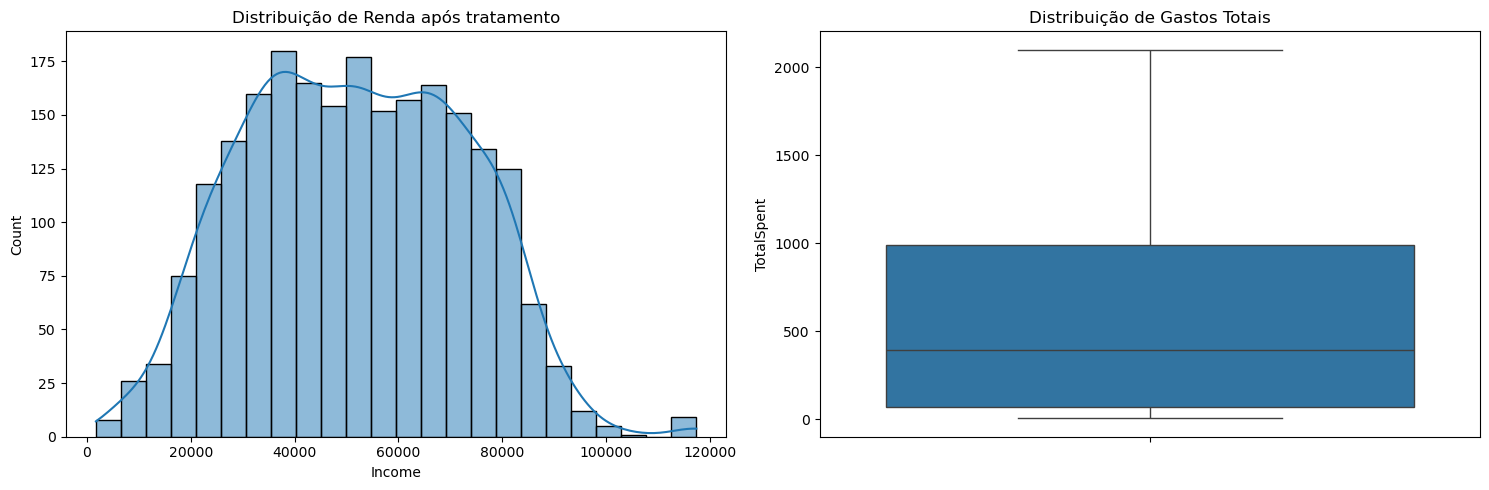

In [18]:
# Visualizar após transformações 
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.histplot(df['Income'], kde=True)
plt.title('Distribuição de Renda após tratamento')

plt.subplot(1,2,2)
sns.boxplot(df['TotalSpent'])
plt.title('Distribuição de Gastos Totais')
plt.tight_layout()
plt.show()
            

In [19]:
# Visualizando as estatísticas descritivas das colunas numericas 
df.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Age,TotalSpent,TotalPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.852232,51865.874554,0.444196,49.109375,302.112946,21.679018,150.873214,32.115848,21.937946,39.487723,5.790179,5.299107,0.0,0.503571,56.147768,568.206696,6.293750
std,11.771725,20936.104821,0.538398,28.962453,331.057356,27.257348,178.816658,40.361485,27.540334,39.927508,3.250958,2.348357,0.0,0.500099,11.771725,547.036742,3.549101
min,1932.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,29.000000,5.000000,0.000000
25%,1959.000000,35538.750000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.0,0.000000,48.000000,68.750000,3.000000
50%,1970.000000,51381.500000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.0,1.000000,55.000000,395.000000,6.000000
75%,1977.000000,68289.750000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.0,1.000000,66.000000,990.500000,9.000000
max,1996.000000,117416.250000,2.000000,99.000000,1225.000000,81.000000,556.000000,120.500000,81.000000,126.500000,13.000000,13.000000,0.0,1.000000,93.000000,2099.500000,14.000000


In [20]:
# Visualizar os valores unicos da coluna categórica Estado Civil
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [21]:
# Padronizar os valores inconsistente 
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd' : 'Single'
})
    

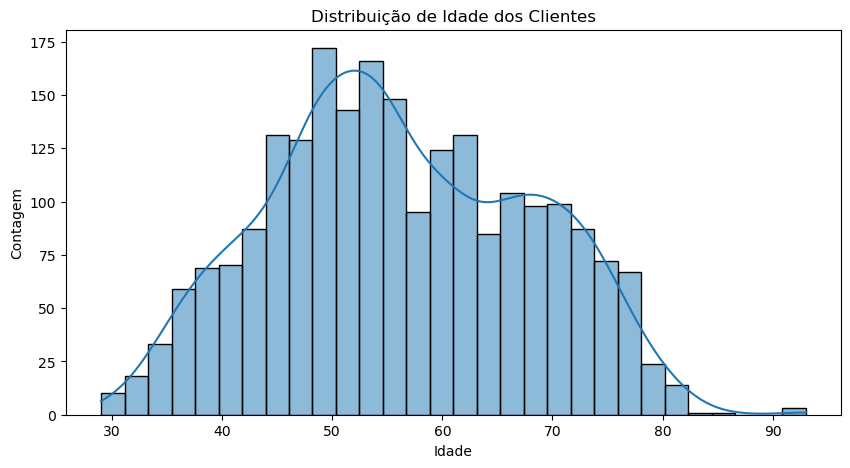

In [22]:
# Análise de Idade 
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

### Análise 
A distribuição mostra que a maioria dos clientes está entre 45-55 anos,
com picos secundários em torno de 65-70 anos, sugerindo duas gerações distintas de clientes.

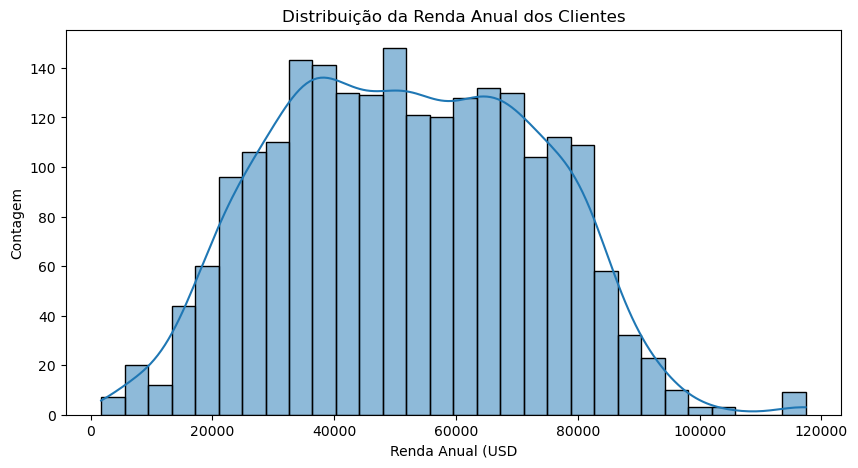

In [24]:
# Análise de Renda 
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Income'] < 150000]['Income'], bins=30, kde=True)
plt.title('Distribuição da Renda Anual dos Clientes')
plt.xlabel('Renda Anual (USD')
plt.ylabel('Contagem')
plt.show()

### Análise 
Podemos observar que o gráfico é assimétrico á direita, com a maioria dos clientes concentrado tendo a renda mais baixa.
A concentração esta principalemente entre 20,000 - 60,000 com o pico em torno de 30,000 40,000.
De acordo com a renda a loja atende principalmente classe média baixa, logo a estratégia de markiting precificação devem ser otimizados nessa faixa de renda.

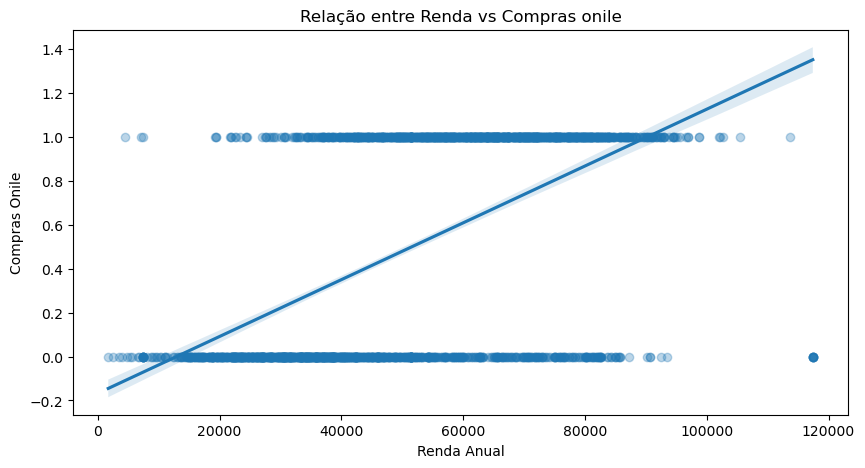

In [26]:
# Relação entre Renda vs Compras Onile 
plt.figure(figsize=(10, 5))
sns.regplot(x='Income', y='WebPurchases', data=df, scatter_kws={'alpha':0.3})
plt.title('Relação entre Renda vs Compras onile')
plt.xlabel('Renda Anual')
plt.ylabel('Compras Onile')
plt.show()

### Análise



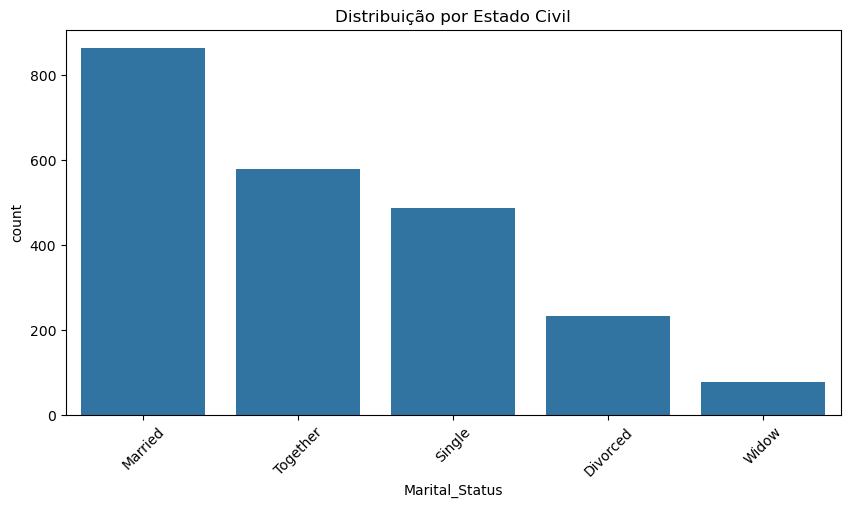

In [28]:
# Estado civil
plt.figure(figsize=(10,5))
order = df['Marital_Status'].value_counts().index
sns.countplot(x='Marital_Status', data=df, order=order)
plt.title('Distribuição por Estado Civil')
plt.xticks(rotation=45)
plt.show()

### Análise 
Podemos visualizar que a maioria dos clientes encontrase em uma união estavél logo, podemos focar nosso esforços com marketing em produtos e promoções de pessoas em conjuntos.
Em terçeira possição ficam os solteiros com um nuúero relevante, além dos produtos para casais podemos tambem criar companhas para esse grupo, para maximizar os resultados. 

### Análises Exploratórias
- Visualizações com **histogramas** e **boxplots** confirmaram a necessidade do tratamento de outliers e ajudaram a visualizar melhor a distribuição das variáveis `Income` e `TotalSpent`.
- Análise da variável `Marital_Status` revelou entradas inconsistentes como "YOLO", "Absurd" e "Alone", que foram padronizadas para "Single" a fim de melhorar a coerência dos dados.
- Também foi possível verificar que **a maioria dos clientes está na faixa etária entre 40 e 70 anos**, e que existe uma **ligeira correlação positiva entre renda e número de compras online**, embora com bastante dispersão.


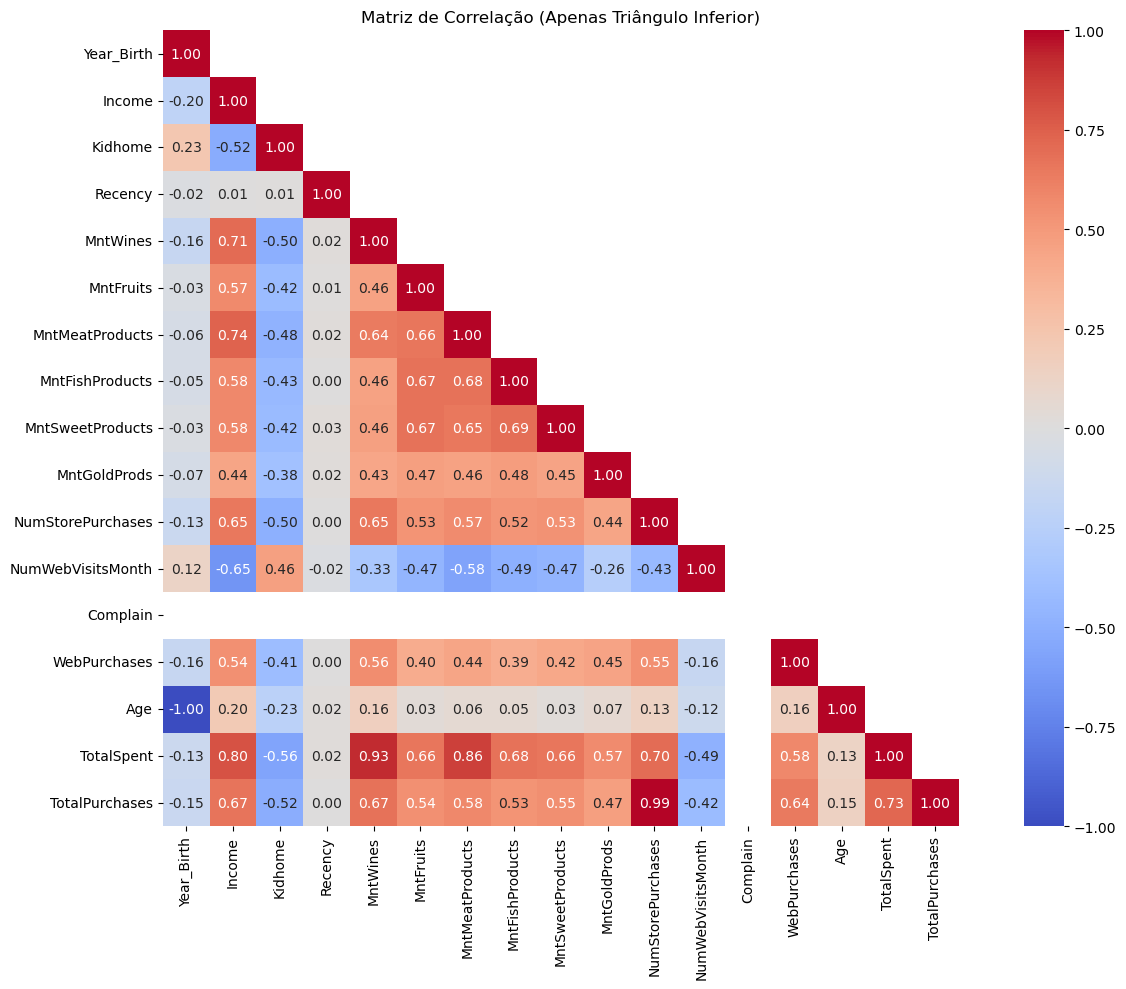

In [81]:
# Matriz de Correlação Corrigida
plt.figure(figsize=(14,10))

# Criar máscara para mostrar apenas o triângulo inferior
mask = np.triu(np.ones_like(df.corr(numeric_only=True)), k=1)  # k=1 move para cima a diagonal

sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            mask=mask,
            vmin=-1, 
            vmax=1,
            square=True)  # Melhora a visualização

plt.title('Matriz de Correlação (Apenas Triângulo Inferior)')
plt.tight_layout()
plt.show()

In [87]:
# Correlação com a variável alvo (WebPurchases) - Ordenado
correlacoes = df_encoded.corr(numeric_only=True)['WebPurchases'].drop('WebPurchases')
correlacoes_ordenadas = correlacoes.abs().sort_values(ascending=False)
correlacoes_ordenadas

TotalPurchases             0.641582
TotalSpent                 0.584341
MntWines                   0.555722
NumStorePurchases          0.546590
Income                     0.541712
MntGoldProds               0.449170
MntMeatProducts            0.443467
MntSweetProducts           0.421986
Kidhome                    0.408147
MntFruits                  0.403238
MntFishProducts            0.392308
Age                        0.159420
Year_Birth                 0.159420
NumWebVisitsMonth          0.159115
Education_Basic            0.140834
Education_PhD              0.067726
Marital_Status_Single      0.037317
Marital_Status_Widow       0.030508
Education_Graduation       0.022278
Education_Master           0.007986
Marital_Status_Together    0.005969
Marital_Status_Married     0.001677
Recency                    0.000328
Complain                        NaN
Name: WebPurchases, dtype: float64

###  Análise de Correlação
Para identificar possíveis variáveis redundantes ou sem impacto na variável-alvo (`WebPurchases`), foi construída uma matriz de correlação visual. Além disso, extraímos uma lista ordenada das variáveis mais correlacionadas com `WebPurchases`, permitindo priorizar as mais relevantes durante a modelagem.

In [32]:
# Transformando as variaveis tegóricas em numéricas 
df_encoded = pd.get_dummies(df, drop_first=True)

### Codificação de Variáveis Cateóricas 
Utilizarmos **One-Hot Encoding** para converter variáveis categóricas em formato numérico. O parâmetro 'drop_first=True' foi utilizado para evitar multicolinearidade entre as categorias geradas.

In [33]:
# Separando as dados em X e y 
X = df_encoded.drop('WebPurchases', axis=1)
y = df_encoded['WebPurchases']

In [34]:
# Separando os dados em treino  teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Padronzar os dados 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Padronização dos Dados 
Como etapa final de pré-processamento, aplicamos a padronização os dados utilizando 'StandarScaler', para garantir que todas as variáveis numéricas estejam na **mesma escola**, o que é especialmente importante para algoritmos baseados em distância e gradiente.

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [37]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Regressão Logística:")
print(classification_report(y_test, y_pred_log))
print("Acurácia:", accuracy_score(y_test, y_pred_log))


Regressão Logística:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       308
           1       0.98      1.00      0.99       364

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672

Acurácia: 0.9880952380952381


In [38]:
# Random Forest Classifier 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Acurácia:", accuracy_score(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       308
           1       0.91      0.96      0.93       364

    accuracy                           0.92       672
   macro avg       0.93      0.92      0.92       672
weighted avg       0.93      0.92      0.92       672

Acurácia: 0.9241071428571429


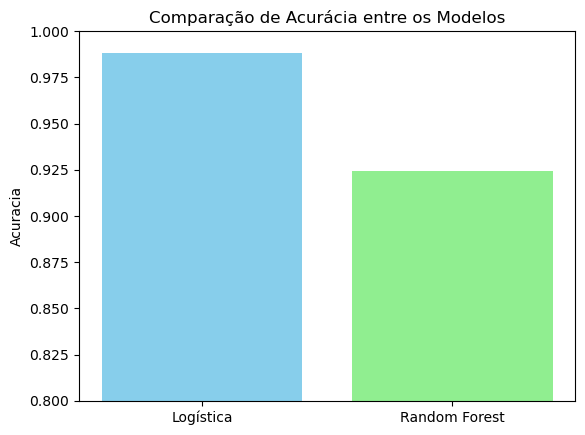

In [101]:
# Comparação Gráfica dos modelos 
modelos = ['Logística', 'Random Forest']
acuracias = [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)]

plt.bar(modelos, acuracias, color=['skyblue', 'lightgreen'])
plt.title('Comparação de Acurácia entre os Modelos')
plt.ylabel('Acuracia')
plt.ylim(0.8, 1.0)
plt.show()

## Etapa 3: Modelagem 

Para esta etapa, testamos dois modelos de classificação binária com o objetivo de prever a variável 'WebPurchases':

### Modelo 1 Regressão Logística 
Utilizamos Regrssão logística com os dadso padronizados. O modelo obeve excelente desempenho, com acurácia de 98.8%, além de f1-score e precisão próximos de 1 para ambas as classes.

### Modelo 2: Random Forest
Em seguida, treinamos um modelo Random forest, que, mesmo sem necessidade de padronização, apresentou acurácia de 92.4%. Apesar de bom, teve desempenho inferior em relação ao modelo anterioir.

Logistic Regression
Acurácia: 0.9241071428571429
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       308
           1       0.91      0.96      0.93       364

    accuracy                           0.92       672
   macro avg       0.93      0.92      0.92       672
weighted avg       0.93      0.92      0.92       672



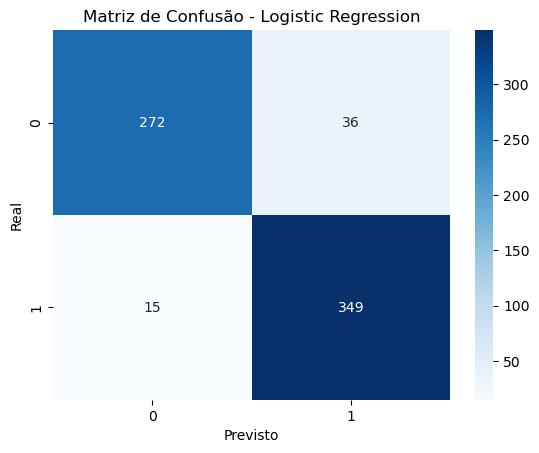

Random Forest
Acurácia: 0.9241071428571429
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       308
           1       0.91      0.96      0.93       364

    accuracy                           0.92       672
   macro avg       0.93      0.92      0.92       672
weighted avg       0.93      0.92      0.92       672



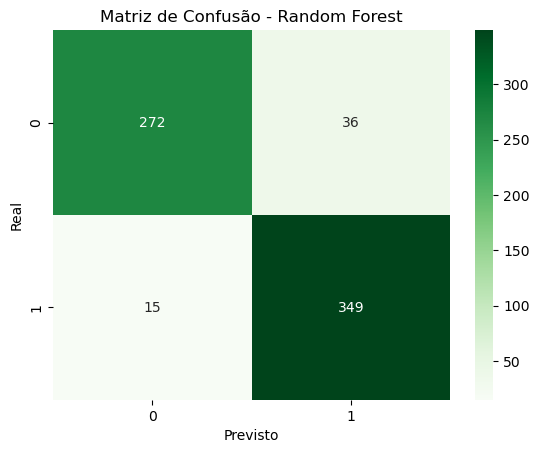

In [40]:
# Logistic Regression
y_pred_lr = log_model.predict(X_test_scaled)
print("Logistic Regression")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Matriz de confusão - Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Logistic Regression")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# -------------------------

# Random Forest (ou outro modelo)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Matriz de confusão - Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


### Comparação
Com base nos resultados de acurácia, precisão, recall e f1-score, o modelo de **Regressão Logística** se mostrou o mais adequado para essa base de dados.
